In [67]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

df = pd.read_csv('data/up.csv')

In [99]:
X = df[['AreaSQM', 'Floors', 'Bedrooms', 'Yard', 'Bathrooms']]
y = df[['Price_Php_M']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.transform(X_train)

### Create and train Sequential Model

In [101]:
# Sequential model
sequential_model = tf.keras.models.Sequential()

# Add layers to the sequential model
sequential_model.add(tf.keras.layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_initializer='normal'))
sequential_model.add(tf.keras.layers.Dense(64, activation='relu'))
sequential_model.add(tf.keras.layers.Dense(32, activation='relu'))
sequential_model.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
sequential_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model
sequential_model.fit(X_train_scaled, y_train, epochs=200, batch_size=10, verbose=1, validation_split=0.2, use_multiprocessing=True)

Epoch 1/200
4/4 [==============================] - 1s 44ms/step - loss: 116.8846 - mean_squared_error: 116.8846 - val_loss: 159.3121 - val_mean_squared_error: 159.3121
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 114.1004 - mean_squared_error: 114.1004 - val_loss: 156.6878 - val_mean_squared_error: 156.6878
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 111.5723 - mean_squared_error: 111.5723 - val_loss: 153.6520 - val_mean_squared_error: 153.6520
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 108.4151 - mean_squared_error: 108.4151 - val_loss: 149.9371 - val_mean_squared_error: 149.9371
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 104.5928 - mean_squared_error: 104.5928 - val_loss: 145.2948 - val_mean_squared_error: 145.2948
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 99.8302 - mean_squared_error: 99.8302 - val_loss: 139.5280 - val_mean_squared_error: 139

### Create and Predict Models

In [104]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV

# Create models
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
elastic_net = ElasticNetCV(alphas=[0.1, 1.0, 10.0], cv=5)

linear_model = LinearRegression(n_jobs=-1)

xgboost = XGBRegressor()
grid_search = GridSearchCV(xgboost, {'max_depth': [2, 4, 6], 'n_estimators': [10, 50, 100]}, verbose=1, cv=5)

# Train the models using the training sets
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

linear_model.fit(X_train_scaled, y_train)
xgboost.fit(X_train_scaled, y_train)
grid_search.fit(X_train_scaled, y_train)

# Make predictions using the testing set
linear_regression_predict = linear_model.predict(X_test_scaled)
xgboost_predict = xgboost.predict(X_test_scaled)

E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

Fitting 5 folds for each of 9 candidates, totalling 45 fits


E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_in

### Evaluate Models

In [105]:
# R squared score for each prediction
print('Ridge R^2: %.2f' % metrics.r2_score(y_test, ridge.predict(X_test_scaled)))
print('Lasso R^2: %.2f' % metrics.r2_score(y_test, lasso.predict(X_test_scaled)))
print('Elastic Net R^2: %.2f' % metrics.r2_score(y_test, elastic_net.predict(X_test_scaled)), end='\n\n')

print('Linear Regression R^2: %.2f' % metrics.r2_score(y_test, linear_regression_predict))
print('XGBoost R^2: %.2f' % metrics.r2_score(y_test, xgboost_predict))
print('XGBoost Grid Search R^2: %.2f' % metrics.r2_score(y_test, grid_search.predict(X_test_scaled)), end='\n\n')

print('Linear regression with Tensorflow R^2: %.2f' % metrics.r2_score(y_test, sequential_model.predict(X_test_scaled)))

Ridge R^2: 0.93
Lasso R^2: 0.94
Elastic Net R^2: 0.95

Linear Regression R^2: 0.93
XGBoost R^2: 0.92
XGBoost Grid Search R^2: 0.91

1/1 [==============================] - 0s 23ms/step
Linear regression with Tensorflow R^2: 0.88


### Plot Predictions

1/1 [==============================] - 0s 20ms/step


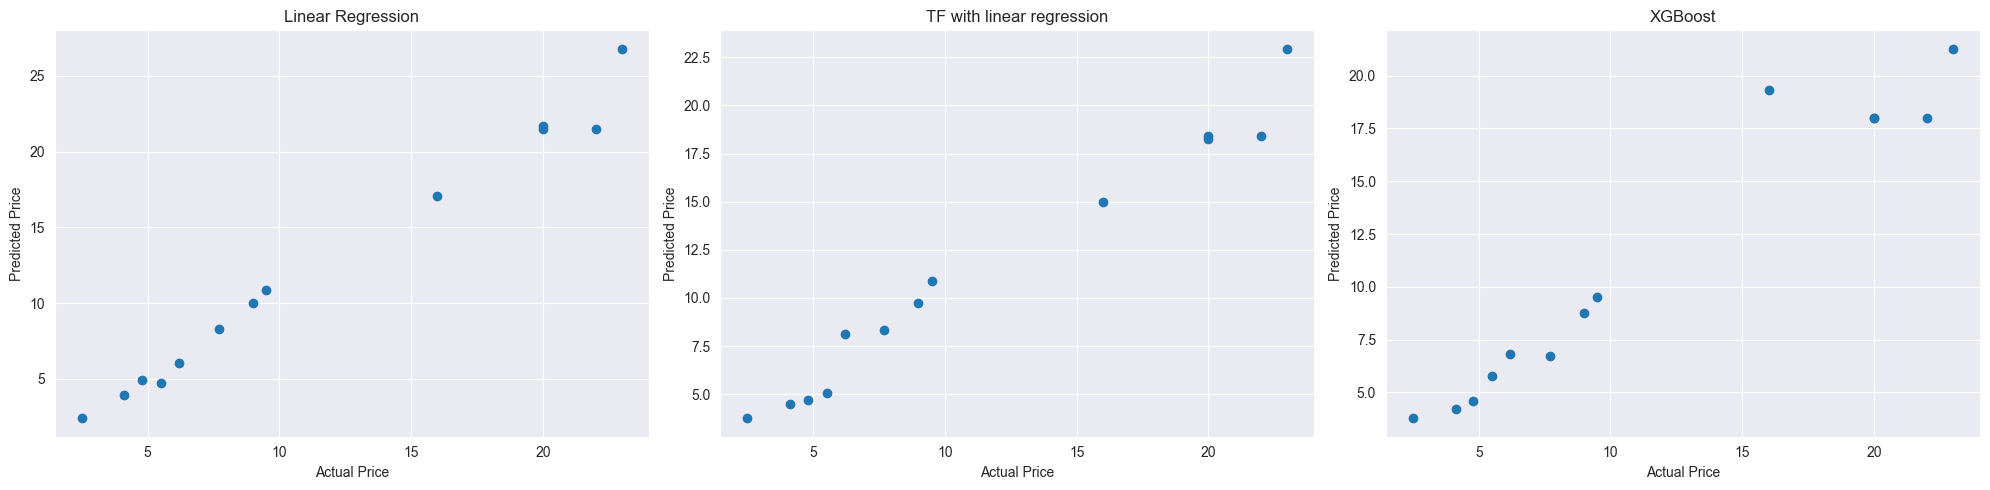

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_regression_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_test, sequential_model.predict(X_test_scaled))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('TF with linear regression')

plt.subplot(1, 3, 3)
plt.scatter(y_test, xgboost_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost')

plt.tight_layout()
plt.show()

<Axes: xlabel='Price_Php_M'>

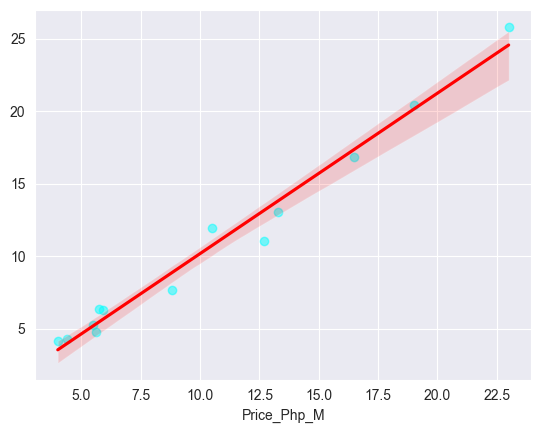

In [13]:
import seaborn as sb

sb.regplot(x= y_test,
           y= linear_regression_predict,
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"}
           )

<Axes: xlabel='Price_Php_M'>

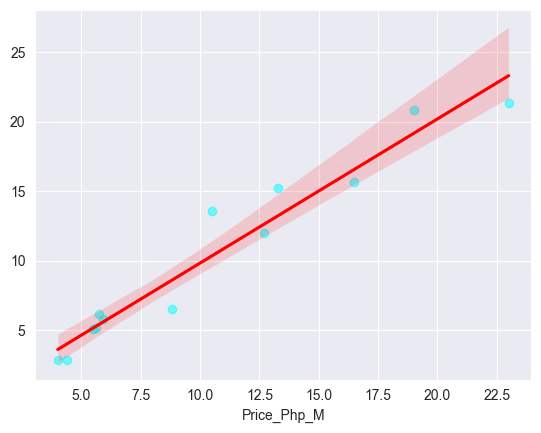

In [14]:
sb.regplot(x= y_test,
           y= xgboost_predict,
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"}
           )

1/1 [==============================] - 0s 19ms/step


<Axes: xlabel='Price_Php_M'>

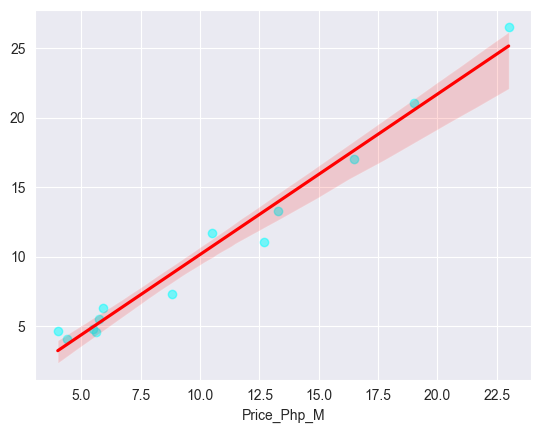

In [15]:
sb.regplot(x= y_test,
           y= sequential_model.predict(X_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"}
           )

### Save Models

In [107]:
from joblib import dump

dump(ridge, 'models/ridge.joblib')
dump(lasso, 'models/lasso.joblib')
dump(elastic_net, 'models/elastic_net.joblib')

dump(linear_model, 'models/linear_regression.joblib')

xgboost.save_model('models/xgboost.json')
dump(grid_search.best_estimator_, 'models/grid_search.joblib')

sequential_model.save('models/sequential.keras')

### Load Trained Models

In [117]:
from joblib import load

trained_ridge = load('models/ridge.joblib')
trained_lasso = load('models/lasso.joblib')
trained_elastic_net = load('models/elastic_net.joblib')

trained_linear_model = load('models/linear_regression.joblib')

trained_xgboost = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, importance_type = 'gain', booster = 'gbtree', tree_method = 'auto', predictor = 'auto')
trained_xgboost.load_model('models/xgboost.json')

trained_grid_search = load('models/grid_search.joblib')

trained_sequential_model = tf.keras.models.load_model('models/sequential.keras')

### Load, Clean, and Normalize the Other Dataset

In [118]:
df_other = pd.read_csv('data/kaggle/output.csv')
df_other.drop_duplicates()

X_other = df_other[['bedrooms', 'bathrooms', 'floors']]
y_other = df_other[['price']]

X_other_train, X_other_test, y_other_train, y_other_test = train_test_split(X_other, y_other, test_size=0.2)

scaler = StandardScaler()
X_other_test_scaled = scaler.fit_transform(X_other_test)
X_other_train_scaled = scaler.transform(X_other_train)

### Retrain the models with the other dataset

In [119]:
trained_ridge.fit(X_other_train_scaled, y_other_train)
trained_lasso.fit(X_other_train_scaled, y_other_train)
trained_elastic_net.fit(X_other_train_scaled, y_other_train)

trained_linear_model.fit(X_other_train_scaled, y_other_train)

trained_xgboost.fit(X_other_train_scaled, y_other_train)
trained_grid_search.fit(X_other_train_scaled, y_other_train)

#trained_sequential_model.fit(X_other_train_scaled, y_other_train, epochs=100, batch_size=10, verbose=1)

E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluate the models with the other dataset

In [120]:
print('Trained Ridge R^2: %.2f' % metrics.r2_score(y_other_test, trained_ridge.predict(X_other_test_scaled)))
print('Trained Lasso R^2: %.2f' % metrics.r2_score(y_other_test, trained_lasso.predict(X_other_test_scaled)))
print('Trained Elastic Net R^2: %.2f' % metrics.r2_score(y_other_test, trained_elastic_net.predict(X_other_test_scaled)), end='\n\n')

print('Trained Linear Regression R^2: %.2f' % metrics.r2_score(y_other_test, trained_linear_model.predict(X_other_test_scaled)))
print('Trained XGBoost R^2: %.2f' % metrics.r2_score(y_other_test, trained_xgboost.predict(X_other_test_scaled)), end='\n\n')

print('Trained XGBoost Grid Search R^2: %.2f' % metrics.r2_score(y_other_test, trained_grid_search.predict(X_other_test_scaled)), end='\n\n')

print('Trained Ridge train score: ' % metrics.r2_score(y_other_train, trained_ridge.predict(X_other_train_scaled)))
print('Trained Ridge test score: ' % metrics.r2_score(y_other_test, trained_ridge.predict(X_other_test_scaled)), end='\n\n')

print('Trained Lasso train score: ' % metrics.r2_score(y_other_train, trained_lasso.predict(X_other_train_scaled)))
print('Trained Lasso test score: ' % metrics.r2_score(y_other_test, trained_lasso.predict(X_other_test_scaled)), end='\n\n')

print('Trained Elastic Net train score: ' % metrics.r2_score(y_other_train, trained_elastic_net.predict(X_other_train_scaled)))
print('Trained Elastic Net test score: ' % metrics.r2_score(y_other_test, trained_elastic_net.predict(X_other_test_scaled)), end='\n\n')

print('Trained Linear Regression train score: ' % metrics.r2_score(y_other_train, trained_linear_model.predict(X_other_train_scaled)))
print('Trained Linear Regression test score: ' % metrics.r2_score(y_other_test, trained_linear_model.predict(X_other_train_scaled)), end='\n\n')

print('Trained XGBoost train score: ', trained_xgboost.score(X_other_train_scaled, y_other_train))
print('Trained XGBoost test score: ', trained_xgboost.score(X_other_test_scaled, y_other_test))

print('Trained XGBoost Grid Search train score: ', trained_grid_search.score(X_other_train_scaled, y_other_train))
print('Trained XGBoost Grid Search test score: ', trained_grid_search.score(X_other_test_scaled, y_other_test), end='\n\n')

Trained Ridge R^2: 0.14
Trained Lasso R^2: 0.14
Trained Elastic Net R^2: 0.13

Trained Linear Regression R^2: 0.14
Trained XGBoost R^2: 0.14

Trained XGBoost Grid Search R^2: 0.15

Trained Ridge train score: 
Trained Ridge test score: 

Trained Lasso train score: 
Trained Lasso test score: 

Trained Elastic Net train score: 
Trained Elastic Net test score: 

Trained Linear Regression train score: 


ValueError: Found input variables with inconsistent numbers of samples: [920, 3680]

### Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

cross_valid_ridge = cross_val_score(trained_ridge, X_other_train_scaled, y_other_train, cv=5, scoring='r2')
cross_valid_lasso = cross_val_score(trained_lasso, X_other_train_scaled, y_other_train, cv=5, scoring='r2')
cross_valid_elastic_net = cross_val_score(trained_elastic_net, X_other_train_scaled, y_other_train, cv=5, scoring='r2')

cross_valid_linear = cross_val_score(trained_linear_model, X_other_train_scaled, y_other_train, cv=5, scoring='r2')
cross_valid_xgboost = cross_val_score(trained_xgboost, X_other_train_scaled, y_other_train, cv=5, scoring='r2')

cross_valid_grid_search = cross_val_score(trained_grid_search, X_other_train_scaled, y_other_train, cv=5, scoring='r2')

print('Trained Ridge Cross Validation R^2: %.2f' % cross_valid_ridge.mean())
print('Trained Lasso Cross Validation R^2: %.2f' % cross_valid_lasso.mean())
print('Trained Elastic Net Cross Validation R^2: %.2f' % cross_valid_elastic_net.mean(), end='\n\n')
print('Trained Linear Regression Cross Validation R^2: %.2f' % cross_valid_linear.mean())
print('Trained XGBoost Cross Validation R^2: %.2f' % cross_valid_xgboost.mean())
print('Trained XGBoost Grid Search Cross Validation R^2: %.2f' % cross_valid_grid_search.mean(), end='\n\n')

E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Source\python\datascience\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A 

Trained Ridge Cross Validation R^2: 0.16
Trained Lasso Cross Validation R^2: 0.16
Trained Elastic Net Cross Validation R^2: 0.16

Trained Linear Regression Cross Validation R^2: 0.16
Trained XGBoost Cross Validation R^2: 0.13
Trained XGBoost Grid Search Cross Validation R^2: 0.14


E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
E:\Source\python\datascience\venv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_in

### Save Models

In [116]:
from joblib import dump

dump(trained_ridge, 'models/ridge.joblib')
dump(trained_lasso, 'models/lasso.joblib')
dump(trained_elastic_net, 'models/elastic_net.joblib')
dump(grid_search.best_estimator_, 'models/grid_search.joblib')

dump(trained_linear_model, 'models/linear_regression.joblib')
trained_xgboost.save_model('models/xgboost.json')

### Plot Predictions with Line regression

<Axes: xlabel='price'>

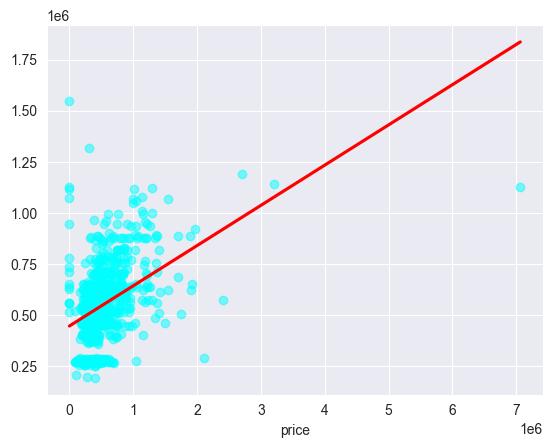

In [52]:
import seaborn as sb

sb.regplot(x= y_other_test,
           y= trained_linear_model.predict(X_other_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"},
           ci= None
           )

<Axes: xlabel='price'>

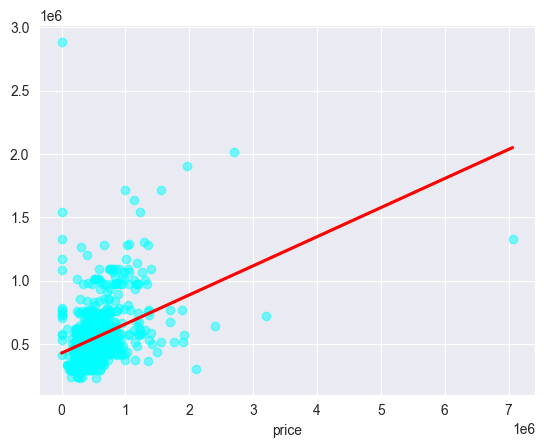

In [53]:
sb.regplot(x= y_other_test,
           y= trained_xgboost.predict(X_other_test_scaled),
           scatter_kws= {"color": "cyan", "alpha": 0.5},
           line_kws= {"color": "red"},
           ci= None
           )

### Plot Learning Curves

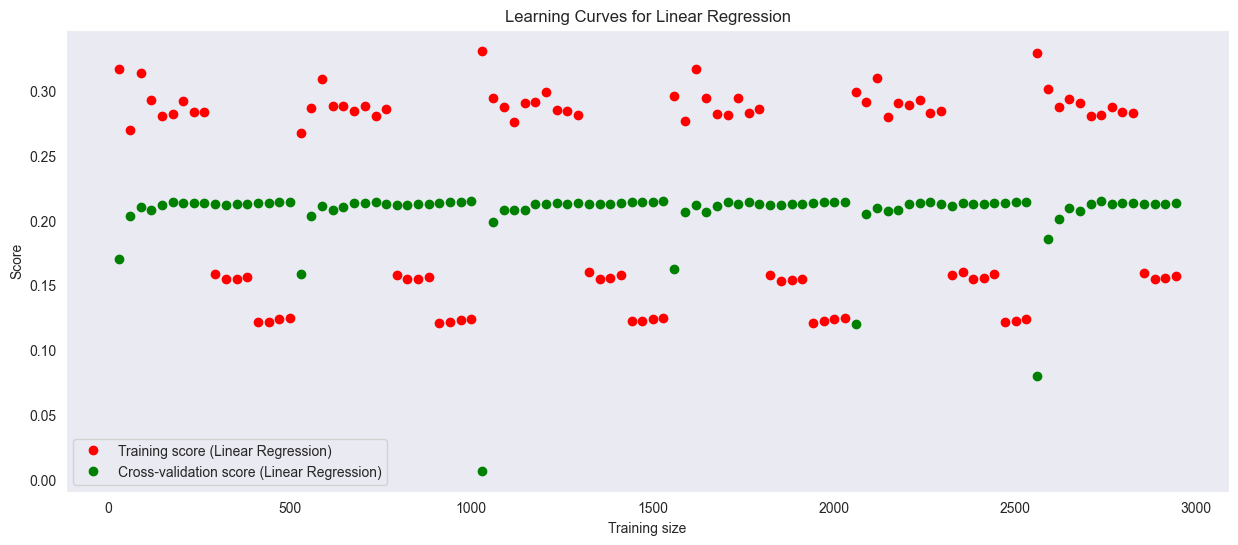

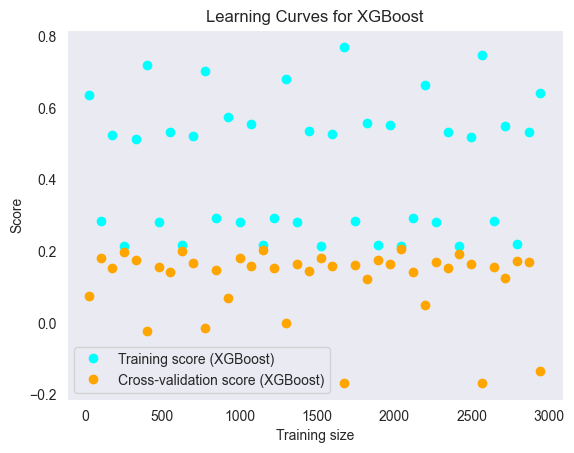

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

plt.figure(figsize=(15, 6))

train_sizes, train_scores, test_scores = learning_curve(
        trained_linear_model,
        X_other_train_scaled,
        y_other_train,
        cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100)
    )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_sizes = list(set(train_sizes))

plt.plot(train_sizes, train_scores_mean, 'o', color="r", label=f"Training score (Linear Regression)")
plt.plot(train_sizes, test_scores_mean, 'o', color="g", label=f"Cross-validation score (Linear Regression)")

plt.xlabel("Training size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves for Linear Regression")
plt.grid()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
        trained_xgboost,
        X_other_train_scaled,
        y_other_train,
        cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 40)
    )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_sizes = list(set(train_sizes))

plt.plot(train_sizes, train_scores_mean, 'o', color="cyan", label=f"Training score (XGBoost)")
plt.plot(train_sizes, test_scores_mean, 'o', color="orange", label=f"Cross-validation score (XGBoost)")

plt.xlabel("Training size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves for XGBoost")
plt.grid()
plt.show()